

# Project: Investigate (no-show appointments) Dataset 
By: Taima Alosaimi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **No-show appointments dataset**: A person makes a doctor appointment, receives all the instructions and no-show?

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

there are (110,527) medical appointments with the (14) associated variables (characteristics): 

● 'PatientId': Identification of a patient

● 'AppointmentID': Identification of each appointment

● 'Gender': Male or Female

● 'Age'

● 'Neighborhood': indicates the location of the hospital.

● 'Scholarship': indicates whether or not the patient is enrolled in Brasilian welfare program.

● 'Hipertension'

● 'Diabetes'

● 'Alcoholism'

● 'Handcap'

● 'SMS_received'

● 'No-show'

> **Questions:** 
1. Is there a relationship between disease type and patient attendance?
2. Is there a relationship between sending (SMS) reminders for the patients with patients attendance?

In [1]:
# Upload necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

##  1. Assessing


In [2]:
# first step: Load the data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

# based on result in this few lines, there are some comments on the data:
# 1. I need to rename the columns (Lower Case, add "_" between the word, replace "-" to "_" in 'No-show')
# 2. there is a problem in the values in 'PatientId' column
# 3. I need to check that there is no value other than (F,M) in 'Gender' column
# 4. I need to check the data type in both 'ScheduledDay','AppointmentDay' to make sure that has "datetime" type
# 5. check the age and make sure that ages between 0 to max value
# 6. change the values in 'No-show' ---> yes: the patient showed up , no: did not show up
# 7. check the missing & duplicate values 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



##  2. Cleaning

In [4]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [5]:
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id','scheduledday':'scheduled_day','appointmentday':'appointment_day'}, inplace=True)

#rename 'no-show' to 'show-up' to make it more clear

df.rename(columns={'no_show':'show_up'}, inplace=True)

In [6]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.shape

(110527, 14)

In [8]:
df.dtypes

# we need to convert:
# 1. to string:
#   - 'PatientId' with type of "float" 
#   - 'appointment_id' with type of "int"  

# 2. to datetime:
#   - 'scheduled_day' with type of "string"
#   - 'appointment_day' with type of "string"

patient_id         float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hipertension         int64
diabetes             int64
alcoholism           int64
handcap              int64
sms_received         int64
show_up             object
dtype: object

In [9]:
# convert data types

# to string
df['patient_id'] = df['patient_id'].astype(str)
df['appointment_id'] = df['appointment_id'].astype(str)

# to datetime
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])
df['appointment_day']=pd.to_datetime(df['appointment_day'])

df.dtypes

patient_id                      object
appointment_id                  object
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hipertension                     int64
diabetes                         int64
alcoholism                       int64
handcap                          int64
sms_received                     int64
show_up                         object
dtype: object

In [10]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.isnull().sum()  

# there is no missing values

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hipertension       0
diabetes           0
alcoholism         0
handcap            0
sms_received       0
show_up            0
dtype: int64

In [12]:
sum(df.duplicated())

# there is no duplicate values

0

In [13]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['show_up'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df.groupby('show_up').count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
show_up,,,,,,,,,,,,,
No,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [16]:
# 6. change the values in 'No-show' ---> yes: the patient showed up , no: did not show up
df['show_up'] = df['show_up'].map(
                   {'Yes':'no' ,'No':'yes'})

In [17]:
df.groupby('show_up').count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
show_up,,,,,,,,,,,,,
no,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319
yes,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208


In [18]:
df['age'].unique()

# I notice that there is a negative value "-1" 

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [19]:
df[df['age'] == -1]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,yes


In [20]:
# replace the negative value '-1' to '1'
df['age'].replace(-1,1 ,inplace=True)

In [21]:
# check 
df[df['age'] == -1]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up


In [22]:
#check
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis (EDA)



## 1. Explore the Data 

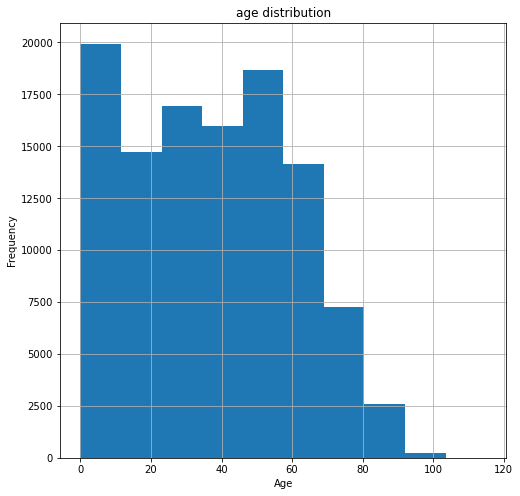

In [23]:
#distribution of patients ages

df.age.hist(figsize= (8,8));
plt.title("age distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

The graph shows that the age distribution for patients ranges between (0-60) years

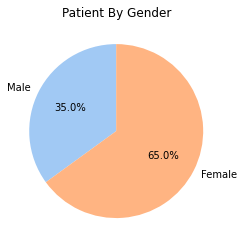

In [24]:
#pie chart to see patient by gender

labels= ['Male', 'Female']

colors = sns.color_palette('pastel')[0:2]

sizes= [df['gender'][df['gender']== 'M'].count(), df['gender'][df['gender']== 'F'].count()]

plt.pie(sizes,labels=labels, colors=colors,startangle=90, autopct='%1.1f%%')

plt.title("Patient By Gender")

plt.show()

The graph shows that the majority of patients were for females by 65% against 35% for males

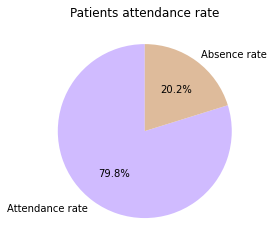

In [25]:
#pie chart to see patient attendance rate

labels= ['Attendance rate', 'Absence rate']

colors = sns.color_palette('pastel')[4:6]

sizes= df['show_up'][df['show_up']== 'yes'].count(), df['show_up'][df['show_up']== 'no'].count()

plt.pie(sizes,labels=labels, colors=colors,startangle=90, autopct='%1.1f%%')

plt.title("Patients attendance rate")

plt.show()

The graph shows overall attendance rate of Patients, and it shows that 79.8% of patients are committed to attending appointments against 20.2% of patients who are absent from their appointments

In [26]:
# find out the patient attendance rate by gender
# first we need to find proportion for each gender

proportion_M_yes = df['patient_id'][(df['gender'] == 'M') & (df['show_up'] == 'yes') ].count()/df['patient_id'][df['gender']== 'M'].count()
proportion_M_no = df['patient_id'][(df['gender'] == 'M') & (df['show_up'] == 'no') ].count()/df['patient_id'][df['gender']== 'M'].count()
proportion_F_yes = df['patient_id'][(df['gender'] == 'F') & (df['show_up'] == 'yes') ].count()/df['patient_id'][df['gender']== 'F'].count()
proportion_F_no = df['patient_id'][(df['gender'] == 'F') & (df['show_up'] == 'no') ].count()/df['patient_id'][df['gender']== 'F'].count()


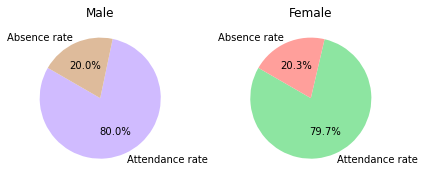

In [27]:
#pie chart to see patient attendance rate by gender

labels= ['Attendance rate', 'Absence rate']

color1 = sns.color_palette('pastel')[4:6] 
color2 = sns.color_palette('pastel')[2:4]

size1= [proportion_M_yes, proportion_M_no]
size2= [proportion_F_yes, proportion_F_no]

plt.subplot(1,2,1)
plt.pie(size1,labels=labels, colors=color1,startangle=150, autopct='%1.1f%%')
plt.title("Male")

plt.subplot(1,2,2)
plt.pie(size2,labels=labels, colors=color2,startangle=150, autopct='%1.1f%%')
plt.title("Female")

plt.tight_layout()
plt.show()


# by using this video: https://www.youtube.com/watch?v=pYaSzEoljh8

This graph shows patient attendance rate by gender, the percentage for both gender are very close in favor of males with an attendance rate of 80% against 79.7% for females.

Which means males are more committed than females in attending the appointments 

In [28]:
# how to find number of handcap patients

handcap = df.groupby(['handcap'])['patient_id'].count()

handcap_sum = handcap[1]+ handcap[2]+ handcap[3]+ handcap[4]
handcap_sum

2241

In [29]:
# find out number of patients for each type of diseases

data = {
    'hipertension_patients': df.hipertension.sum(),
    'diabetes_patients': df.diabetes.sum(),
    'alcoholism_patients': df.alcoholism.sum(),
    'handcap_patients': handcap_sum
}

data

{'hipertension_patients': 21801,
 'diabetes_patients': 7943,
 'alcoholism_patients': 3360,
 'handcap_patients': 2241}

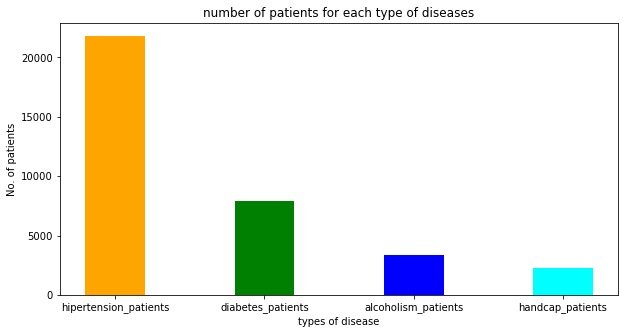

In [30]:
#bar chart to see number of patients for each type of diseases

#creating the dataset
diseases = list(data.keys())
patients = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(diseases, patients, width = 0.4, color=['orange', 'green', 'blue', 'cyan'])
 
plt.xlabel("types of disease")
plt.ylabel("No. of patients")
plt.title("number of patients for each type of diseases")
plt.show()

The graph shows the number of patients for each type of disease or disability, where hipertension has the highest number of patients while the handcap has the least number of patients.

## 2. Answer the Questions Related to the Data

### Question 1: Is there a relationship between disease type and patient attendance?

In [31]:
# find out the patient attendance rate by disease type
# first we need to find proportion for each disease type

proportion_hiper_yes = df['patient_id'][(df['hipertension'] == 1) & (df['show_up'] == 'yes') ].count()/df['patient_id'][df['hipertension']== 1].count()
proportion_hiper_no = df['patient_id'][(df['hipertension'] == 1) & (df['show_up'] == 'no') ].count()/df['patient_id'][df['hipertension']== 1].count()

proportion_diab_yes = df['patient_id'][(df['diabetes'] == 1) & (df['show_up'] == 'yes') ].count()/df['patient_id'][df['diabetes']== 1].count()
proportion_diab_no = df['patient_id'][(df['diabetes'] == 1) & (df['show_up'] == 'no') ].count()/df['patient_id'][df['diabetes']== 1].count()

proportion_alcoho_yes = df['patient_id'][(df['alcoholism'] == 1) & (df['show_up'] == 'yes') ].count()/df['patient_id'][df['alcoholism']== 1].count()
proportion_alcoho_no = df['patient_id'][(df['alcoholism'] == 1) & (df['show_up'] == 'no') ].count()/df['patient_id'][df['alcoholism']== 1].count()



In [32]:
## I need to find proportion for handcap since there (0,1,2,3,4)
handcap_new = df

handcap_new.groupby('handcap').count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,show_up
handcap,,,,,,,,,,,,,
0,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286
1,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042
2,183,183,183,183,183,183,183,183,183,183,183,183,183
3,13,13,13,13,13,13,13,13,13,13,13,13,13
4,3,3,3,3,3,3,3,3,3,3,3,3,3


In [33]:
#replace the values in handcap to (0,1) only
handcap_new['handcap'] = handcap_new['handcap'].map(
                   {0:0, 1:1, 2:1 , 3:1 , 4:1})


handcap_new.groupby('handcap').count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,show_up
handcap,,,,,,,,,,,,,
0,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286
1,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241,2241


In [34]:
# find proportion for handcap
proportion_handcap_yes = df['patient_id'][(df['handcap'] == 1) & (df['show_up'] == 'yes') ].count()/df['patient_id'][df['handcap']== 1].count()
proportion_handcap_no = df['patient_id'][(df['handcap'] == 1) & (df['show_up'] == 'no') ].count()/df['patient_id'][df['handcap']== 1].count()


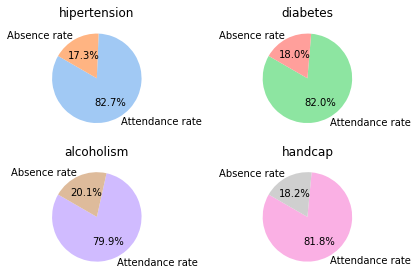

In [35]:
#pie chart to see patient attendance rate by disease type

labels= ['Attendance rate', 'Absence rate']

color1 = sns.color_palette('pastel')[0:2] 
color2 = sns.color_palette('pastel')[2:4]
color3 = sns.color_palette('pastel')[4:6]
color4 = sns.color_palette('pastel')[6:8]

size1= [proportion_hiper_yes, proportion_hiper_no]
size2= [proportion_diab_yes, proportion_diab_no]
size3= [proportion_alcoho_yes, proportion_alcoho_no]
size4= [proportion_handcap_yes , proportion_handcap_no]

plt.subplot(2,2,1)
plt.pie(size1,labels=labels, colors=color1,startangle=150, autopct='%1.1f%%')
plt.title("hipertension")

plt.subplot(2,2,2)
plt.pie(size2,labels=labels, colors=color2,startangle=150, autopct='%1.1f%%')
plt.title("diabetes")

plt.subplot(2,2,3)
plt.pie(size3,labels=labels, colors=color3,startangle=150, autopct='%1.1f%%')
plt.title("alcoholism")

plt.subplot(2,2,4)
plt.pie(size4,labels=labels, colors=color4,startangle=150, autopct='%1.1f%%')
plt.title("handcap")

plt.tight_layout()
plt.show()
 
# by using this video: https://www.youtube.com/watch?v=pYaSzEoljh8

This graph shows the patient attendance rate by each type of disease or disability, it is clear that the patients with hipertension were the most committed to attend appointments by 82.7% compared to patients with alcoholism with the highest percentage of absenteeism by 20.1%

### Question 2: Is there a relationship between sending (SMS) reminders for the patients with patients attendance?

Text(0, 0.5, 'no. of patients')

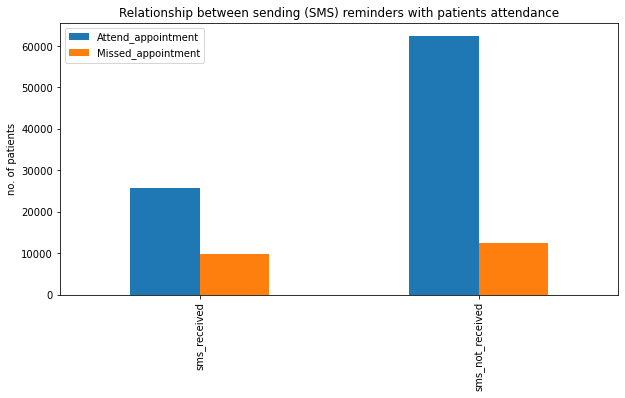

In [36]:
#bar chart to see relationship between sending (SMS) reminders with patients attendance

plotdata = pd.DataFrame({

    "Attend_appointment":[df['patient_id'][(df['sms_received'] == 1) & (df['show_up'] == 'yes') ].count(),df['patient_id'][(df['sms_received'] == 0) & (df['show_up'] == 'yes') ].count()],

    "Missed_appointment":[df['patient_id'][(df['sms_received'] == 1) & (df['show_up'] == 'no') ].count() ,df['patient_id'][(df['sms_received'] == 0) & (df['show_up'] == 'no') ].count()]},

    index=["sms_received", "sms_not_received"])

plotdata.plot(kind="bar",figsize=(10, 5))

plt.title("Relationship between sending (SMS) reminders with patients attendance")

plt.ylabel("no. of patients")


    
# by using this link: https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

The graph shows the total number of attend and absent patients who has received SMS message vs who has not received SMS message 

In [37]:
# first find proportions
proportion_sms_received_yes = df['patient_id'][(df['sms_received'] == 1) & (df['show_up'] == 'yes') ].count()/df['patient_id'][df['sms_received']== 1].count()
proportion_sms_received_no = df['patient_id'][(df['sms_received'] == 1) & (df['show_up'] == 'no') ].count()/df['patient_id'][df['sms_received']== 1].count()
proportion_sms_not_received_yes = df['patient_id'][(df['sms_received'] == 0) & (df['show_up'] == 'yes') ].count()/df['patient_id'][df['sms_received']== 0].count()
proportion_sms_not_received_no = df['patient_id'][(df['sms_received'] == 0) & (df['show_up'] == 'no') ].count()/df['patient_id'][df['sms_received']== 0].count()


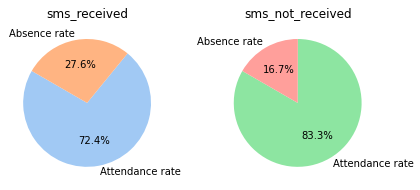

In [38]:
#pie chart to see relationship between sending (SMS) reminders with patients attendance

labels= ['Attendance rate', 'Absence rate']

color1 = sns.color_palette('pastel')[0:2] 
color2 = sns.color_palette('pastel')[2:4]

size1= [proportion_sms_received_yes, proportion_sms_received_no]
size2= [proportion_sms_not_received_yes, proportion_sms_not_received_no]

plt.subplot(1,2,1)
plt.pie(size1,labels=labels, colors=color1,startangle=150, autopct='%1.1f%%')
plt.title("sms_received")

plt.subplot(1,2,2)
plt.pie(size2,labels=labels, colors=color2,startangle=150, autopct='%1.1f%%')
plt.title("sms_not_received")

plt.tight_layout()
plt.show()


# by using this video: https://www.youtube.com/watch?v=pYaSzEoljh8

The graph shows the percentage of attend and absent patients who has received SMS message vs who has not received SMS message

<a id='conclusions'></a>
## Conclusions

### Summary:

**First**  I started with a general analysis for the data and I found the following:

1- The age distribution ranges between (0-60) years

2- The majority of patients were for females by 65% against 35% for males

**After that** , I focused more in the analysis on an important variable for the given data, which is the attendance and absence of the patients. so, at first I analyzed the total attendance rate for patients and it was 79.8% against 20.2%, the total absence rate for patients.


**next** I went more detailed on the analysis to find out which of the females and males are more committed to attending the appointments, and the percentage was very close in favor of males, with an attendance rate of 80% against 79.7% for females.

**then**  I was interested in knowing the number of patients for each type of disease or disability, where hipertension was the leader with the largest number of patients, and the handcap has the least number of patients.




**Finally, I started to ask questions interested in knowing it through the available data, which are:**

**1- Is there a relationship between disease type and patient attendance?**

the result was relatively close for all diseases  or disability types, the patients with hipertension were the most committed to attend appointments by 82.7% compared to patients with alcoholism with the highest percentage of absenteeism by 20.1%


**2-  Is there a relationship between sending (SMS) reminders for the patients with patients attendance?**

It found that there is no clear relationship, as the attendance rate of those who did not receive SMS messages (83.3%) is higher than those who received SMS messages (72.4%).


### limitations in the data:
1- Limited number of variables cause  limited analysis

2- some of variables has wrong data type 

3- Time constraints
